dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
{'cylinders': ['3', '4', '5', '6', '8']}
[1.400e+01 4.000e+00 3.500e+02 1.650e+02 4.209e+03 1.200e+01 1.972e+03]


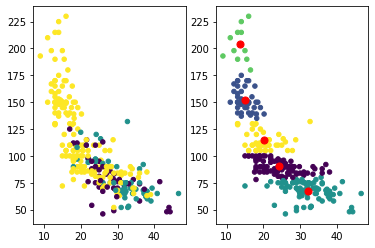

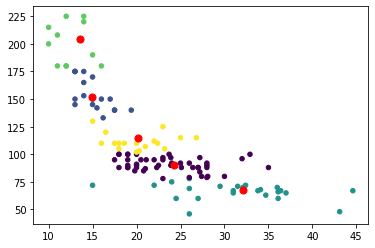

In [2]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

samochody = fetch_openml('cars1')

print(samochody.keys())
print(samochody['feature_names'])
print(samochody['categories'])
print(samochody['data'][0])

X = samochody.data[:, [0, 3]]
y = samochody['target']
y = [int(elem) for elem in y]

#ZBIÓR UCZĄCY I TESTOWY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)

#KLASYFIKATOR Z 6 KLASTRAMI
kmn = KMeans(n_clusters=6)

#POWYŻSZY KLASYFIKATOR I DANE TRENINGOWE
kmn.fit(X_train)

#PUNKTY CENTRALNE Z KLASRÓW
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
#PIERWSZY WYKRES
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

#DANE TRENINGOWE
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

#DZIAŁANIE NA ZBIORZE TESTOWYM
y_pred = kmn.predict(X_test)

#NOWE KLASY STWORZONE DZIĘKI KLASTROWANIU
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze

PODZIAŁ SAMOCHODÓW MNIEJ WIĘCEJ NA SPORTOWE I EKONOMICZNE PRZY CZYM SPORTOWE MAJĄ MNIEJSZY BAK I WIĘCEJ KM, MIEJSCKIE, KTÓRE
MAJĄ MNIEJ KONI MECHANICZNYCH I MNIEJSZE SPALANIE.